In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import torch
import pickle
from pymoo.indicators.hv import HV
from pymoo.config import Config
from metrics import mean_Euclidean_dist
Config.warnings['not_compiled'] = False
from pymoo.util.ref_dirs import get_reference_directions
from partitioning import sampling_vector_randomly, sampling_vector_evenly
from pymoo.problems import get_problem as get_prob_pymoo
from problem import get_problem
from pymoo.problems import get_problem as get_problem2

In [2]:
def front_truth(problem_name):
    if problem_name == "DTLZ2":
        n_sample = 20
        r = 1
        u = np.linspace(0, np.pi/2, n_sample)
        v = np.linspace(0, np.pi/2, n_sample)
        a = np.expand_dims(r*np.outer(np.cos(u), np.sin(v)).flatten(), axis=1)
        b = np.expand_dims(r*np.outer(np.sin(u), np.sin(v)).flatten(), axis=1)
        c = np.expand_dims(r*np.outer(np.ones(np.size(u)), np.cos(v)).flatten(), axis=1)
        return np.hstack((a,b,c))

In [3]:
log_dir = "weight/ablation_DTLZ2_2stage"
problem = get_problem("DTLZ2")
ref_point = problem.nadir_point 
ref_point = [1.1 * x  for x in ref_point]
hv = HV(ref_point=np.array(ref_point))
truth_pareto = front_truth("DTLZ2")
max_HV = hv(truth_pareto)

pref_vec_test = sampling_vector_evenly(3, 300)
f_truth =  get_problem2("dtlz2").pareto_front(pref_vec_test)

start = 40
end = 230
step = 10
scale = 2
save = 1

In [4]:
x_axis = []
y_axis = []
for evaluation in range(start, end, step*scale):
    Y_solution = np.load(f'{log_dir}/evaluation_DTLZ2_Y_6_2_stage_{evaluation}_warmup.npy')
    

    x_axis.append(evaluation)
    HV_score = np.log(np.clip(max_HV - hv(Y_solution), a_min=1e-14, a_max=max_HV))
    y_axis.append(HV_score)
    
x_axis2 = []
y_axis2 = []
for evaluation in range(start, end, step*scale):
    Y_solution = np.load(f'{log_dir}/front_DTLZ2_6_2_stage_{evaluation}_warmup.npy')
    

    x_axis2.append(evaluation)
    y_axis2.append(mean_Euclidean_dist(f_truth, Y_solution[-1]))


/tmp/ipykernel_2280998/776280542.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=5.0)


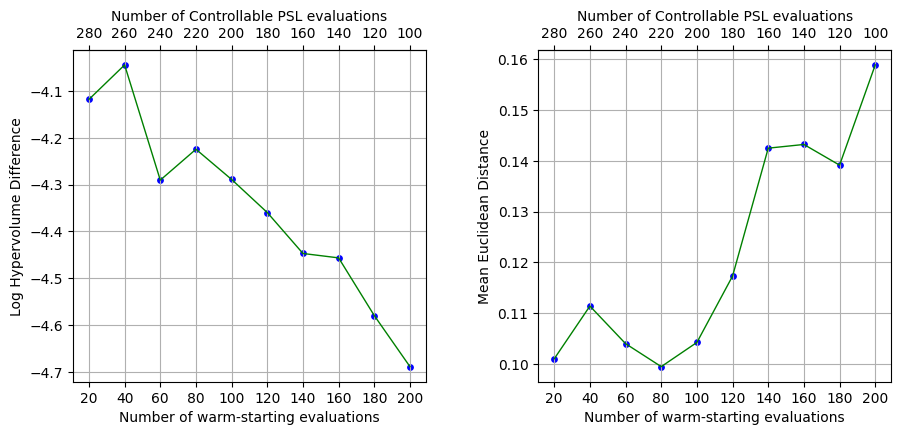

In [5]:
fig, axs = plt.subplots(figsize = (10, 5), ncols = 2, nrows=1, layout="constrained")
axs = axs.flatten()
fig.tight_layout(pad=5.0)

axs[0].plot(x_axis, y_axis, color='green', linewidth=1)
axs[0].scatter(x_axis, y_axis, color='blue', s = 15, zorder = 1)
axs[0].grid()
axs[0].set_xticks(np.arange(start, end, step*scale))
axs[0].set_xticklabels(np.arange(start-20, end-20, step*scale))
axs[0].set_ylabel("Log Hypervolume Difference")
axs[0].set_xlabel("Number of warm-starting evaluations")

ax0 = axs[0].secondary_xaxis("top")
ax0.set_xlabel("Number of Controllable PSL evaluations")
ax0.set_xticks(np.arange(start, end, step*scale))
ax0.set_xticklabels(300-np.arange(start-20, end-20, step*scale))

axs[1].plot(x_axis2, y_axis2, color='green', linewidth=1)
axs[1].scatter(x_axis2, y_axis2, color='blue', s = 15, zorder = 1)
axs[1].grid()
axs[1].set_xticks(np.arange(start, end, step*scale))
axs[1].set_xticklabels(np.arange(start-20, end-20, step*scale))
axs[1].set_ylabel("Mean Euclidean Distance")
axs[1].set_xlabel("Number of warm-starting evaluations")

ax1 = axs[1].secondary_xaxis("top")
ax1.set_xlabel("Number of Controllable PSL evaluations")
ax1.set_xticks(np.arange(start, end, step*scale))
ax1.set_xticklabels(300-np.arange(start-20, end-20, step*scale))


# fig.suptitle(f"Trade-off performance between 2 stages after 300 evaluations", y=1.02)

plt.savefig("visualization_plot/Ablation_warmup_step_final.pdf", bbox_inches='tight')
plt.show()
